In [ ]:
Simple Example to understand ARIMA code 

Next 5 days forecast:
2023-01-11    63.761575
2023-01-12    65.999957
2023-01-13    63.761618
2023-01-14    65.999914
2023-01-15    63.761661
Freq: D, Name: predicted_mean, dtype: float64


/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


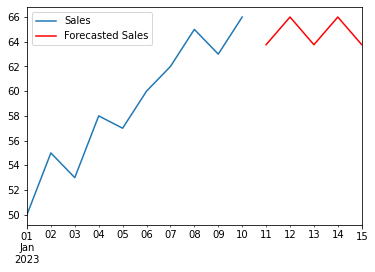

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA # library to import for ARIMA 
import matplotlib.pyplot as plt

# Example data: ice cream sales over 10 days
data = [50, 55, 53, 58, 57, 60, 62, 65, 63, 66] # Number of ice creams sold over a 10 day period 
index = pd.date_range(start='2023-01-01', periods=len(data), freq='M')# start date is first day range and periods in the length of data which is 10 days and frequency is daily

# Create a pandas DataFrame
df = pd.DataFrame(data, index=index, columns=['Sales'])

# Fit the ARIMA model (p=1, d=1, q=1) usually best for small datasets so overfiiting does not happen. should be a balance
# why choose 1? we can choose numbers other than 1 based on how large our actual dataset is going to be and python 
# provides libraries for us to best choose our p,d,q values i.e; ACF plot ( moving average [q]), PACF plot (autoregressive [p])
# ADF test [d], we can also try experimenting by changing the valiues and choose the best one whihc gives us high accuracy 
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 5 days
forecast = model_fit.forecast(steps=5)

# Print forecasted values
print(f"Next 5 days forecast:\n{forecast}")

# Plot actual vs forecasted
df.plot(label='Actual Sales')
forecast.plot(label='Forecasted Sales', color='red')
plt.legend()
plt.show()


This code generates our RMSE error value to help evaluate our models the lower the RMSE score the better our model is at making predicitions 

Mean Absolute Error (MAE): 0.6130093791802089
Root Mean Squared Error (RMSE): 0.7457344521956015


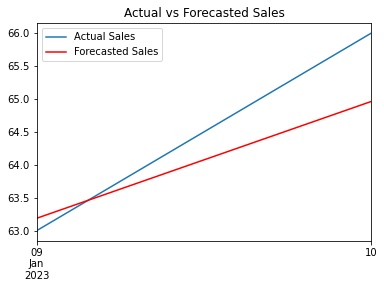

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example time series data (ice cream sales)
data = [50, 55, 53, 58, 57, 60, 62, 65, 63, 66]
index = pd.date_range(start='2023-01-01', periods=len(data), freq='D')

# Create pandas DataFrame
df = pd.DataFrame(data, index=index, columns=['Sales'])

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

# Fit ARIMA model on training data
model = ARIMA(train, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast the length of the test set
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot actual vs forecasted values
test.plot(label='Actual Sales')
forecast.plot(label='Forecasted Sales', color='red')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.show()


In [ ]:
in our ice cream ARIMA Model we see that we got a RMSE score of 0.74 our model predictions are off by 0.74 units. 

Using Dummy values for NDVI Values 

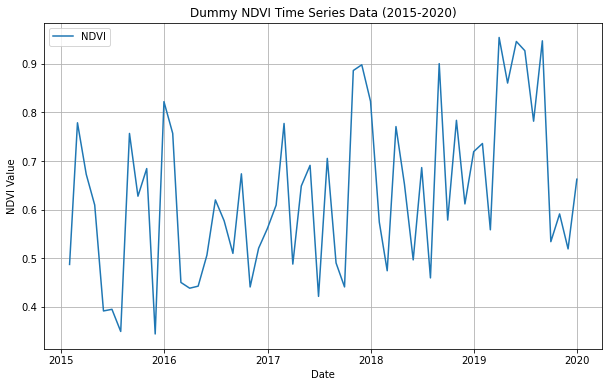

                NDVI
Date                
2015-01-31  0.487270
2015-02-28  0.778747
2015-03-31  0.672777
2015-04-30  0.609499
2015-05-31  0.391569


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate dummy NDVI data for 5 years (monthly data, 60 months in total)
# NDVI values typically range between -1 and 1, but for vegetation they are usually between 0.2 and 0.9
months = pd.date_range(start='2015-01-01', periods=60, freq='M')
ndvi_values = np.random.uniform(low=0.3, high=0.8, size=(60,))  # Simulating random NDVI values between 0.3 and 0.8

# Introduce a small trend (e.g., gradual vegetation increase)
trend = np.linspace(0, 0.2, 60)  # Linear trend from 0 to 0.2 over 60 months
ndvi_values = ndvi_values + trend  # Adding the trend to the NDVI values

# Create a DataFrame with Date and NDVI columns
ndvi_df = pd.DataFrame({'Date': months, 'NDVI': ndvi_values})
ndvi_df.set_index('Date', inplace=True)

# Visualize the generated NDVI data
plt.figure(figsize=(10, 6))
plt.plot(ndvi_df.index, ndvi_df['NDVI'], label='NDVI')
plt.title('Dummy NDVI Time Series Data (2015-2020)')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.legend()
plt.grid(True)
plt.show()

# Save the dataset to a CSV (optional)
ndvi_df.to_csv('dummy_ndvi_data.csv')

# Show first few rows of the dataset
print(ndvi_df.head())


/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDVI   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  23.553
Date:                Thu, 10 Oct 2024   AIC                            -41.106
Time:                        18:54:46   BIC                            -34.873
Sample:                    01-31-2015   HQIC                           -38.673
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.142      0.589      0.556      -0.195       0.362
ma.L1         -0.8998      0.068    -13.177      0.000      -1.034      -0.766
sigma2         0.0257      0.007      3.790      0.0

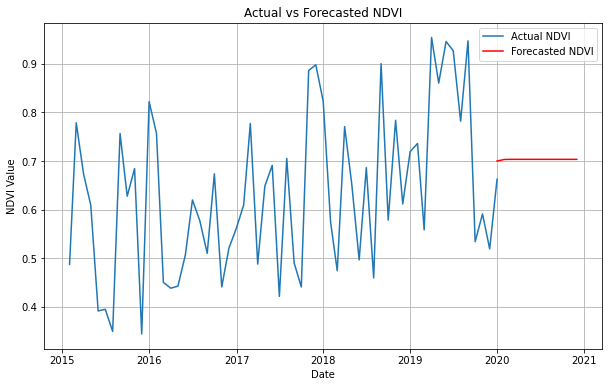

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(ndvi_df['NDVI'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 12 months (for example)
forecast = model_fit.forecast(steps=12)

# Print forecasted NDVI values
print(f"Next 12 months forecast:\n{forecast}")

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ndvi_df.index, ndvi_df['NDVI'], label='Actual NDVI')
forecast_index = pd.date_range(start=ndvi_df.index[-1], periods=12, freq='M')
plt.plot(forecast_index, forecast, label='Forecasted NDVI', color='red')
plt.title('Actual vs Forecasted NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.legend()
plt.grid(True)
plt.show()
